## Sinusoidal time series with Gaussian Noise: statistical properties 

We generate the time series:  $x(t) = A \sin{(t)} + 1 + \mathcal{N}(0,\sigma_{0})$. 
    
We fix $\sigma_{0} = 0.1$, $N_{points} = 100$, and make use of the AstroML 5.8 code $10^{4}$ times. At each iteration calculate :

* $\chi^{2}_{DOF} = \frac{1}{N}  \sum((x_{i} - 1  ) /  \sigma_{0})^{2}$
* mean : $\langle \sigma_{int} \rangle = \frac{\sum \sigma p(\sigma_{int})}{\sum p(\sigma_{int})}  $ 
* standard deviation : stdev($\sigma_{int}$) = $\left(\frac{\sum \sigma_{int}^{2}p(\sigma_{int}) } {\sum p(\sigma_{int})} - \langle \sigma_{int} \rangle^{2} \right) ^{1/2}$

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/Users/chris/GradResearch/SDSS_S82_FP_research/S82analysis/packages/')
import variabilityFunctions as varF

In [2]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data, mu_true=1, sig_true=None, suptitle=None, figtitle=None, plot_mean_stdev=False): 
    # Setup plots specifics
    #setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(16, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                        bottom=0.15, top=0.88)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #mu_true=1
    ax[0].axvline(mu_true, ls=':', color='k')
    #ax[0].axvline(np.mean(, ls=':', color='b')
    
    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='full')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approx')

    if plot_mean_stdev is True :  
        E = np.sum(p_sigma*sigma) / np.sum(p_sigma)   # mean 
        stdev = np.sqrt(np.sum(sigma*sigma*p_sigma)/ np.sum(p_sigma)  - E*E)  # stdev 
        max_value = max(p_sigma)
        value_at_mean = np.interp(x=E,xp=sigma_int,fp=p_sigma)
        
        ax[1].axhline(max_value, ls='-.', c='cyan')
        ax[1].axhline(value_at_mean, ls='-.', c='r')
        ax[1].axvline(E, color='green', ls='--')
        ax[1].axvline(E+stdev, color='red', ls='--')
        ax[1].axvline(E-stdev, color='red', ls='--')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    if sig_true is not None: 
        ax[1].axvline(sig_true, ls=':', color='k')

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    #ax[1].set_xlim(0, 0.4)
    #ax[1].set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')

    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    #ax[2].set_xlim(23.84, 23.96)
    #ax[2].set_ylim(0,0.12)
    ticks = ax[2].get_xticks()
    if len(ticks) > 6 : 
        ax[2].set_xticks(ticks[::2])
        
    #plt.locator_params(axis=ax[2],nbins=4)
    #ticks = ax[2].get_yticks()
    #ax[2].set_yticks(ticks[::2])
    if suptitle is not None:
        fig.suptitle(suptitle, fontsize=15)
    #plt.tight_layout()
    name = '../data_products/'+figtitle
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()
    plt.close(fig)
    

## 10000 iterations loop

This is the calculation loop; it takes about 10 minutes to run on a Mac , save time by loading the results of  the most recent calculation 

In [41]:
%matplotlib inline

N = 100.0  # number of points in time series  
Nboot = 1000  # number of bootstraps 
A_values = np.linspace(0.01, 1, 100) # [0.01, 0.1, 0.7,1.0]   
sigma_0 = 1.0  # the standard deviation of Gaussian distribution from which we source homoscedastic errors 
N_iterations = 1000  # number of times we realize time series, calculating chi2,  and properties of p(sigma)
                 #  at each realization 

#sigma = [1.0] # [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5, 1]
# that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 

# counter for printing pictures in order 
i = 0

# initialize the time array : only one period of the sinusoid 
t = np.linspace(0,2*np.pi, num=N)

stats = {}  # array to store values 

# an array of keys, to have control over the quality of floats used for indexing 
# http://stackoverflow.com/questions/23721230/float-values-as-dictionary-key 
A_keys =[round(value,4) for value in A_values]

for j in range(len(A_values)) : 
    print(' A value is %f' % A_values[j])
    stats[A_keys[j]] = {}
    stats[A_keys[j]]['mean_sigma']       = np.zeros(N_iterations)
    stats[A_keys[j]]['value_at_mean']    = np.zeros(N_iterations)
    stats[A_keys[j]]['stdev']            = np.zeros(N_iterations)
    stats[A_keys[j]]['max_height']       = np.zeros(N_iterations)
    stats[A_keys[j]]['chi2dof']          = np.zeros(N_iterations)

    A = A_values[j]
    
    for k in range(N_iterations):

        # define the time series 
        ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t)) 
        xi = A* np.sin(t) + 1 + ei
        
        # save the time series 
        save_time_series = False
        if save_time_series == True : 
            fname  = '../data_products/11_27_16_time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                       '_iteration_'+str(k).rjust(3,'0')+'.txt'
            np.savetxt(fname, np.column_stack((xi,ei)))
        
        # make a figure of the time series
        plot_time_series = False
        if plot_time_series == True  : 
            fig,ax = plt.subplots()
            label = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma)$'+ ', '+r'$\sigma=$'+str(sigma_0)
            ax.scatter(t,xi, lw=0, label=label)
            ax.errorbar(t,xi,sigma_0, ls='')
            #ax.set_ylim(-10,12)
            #plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
            #print('Amin = %f'%(3*sigma_0 / N**(0.25)))
            #print('mean of xi=%f'%np.mean(xi))
            #print('sigma=%f'%ssigma_0)

        # Fig 5.8 calculation
        plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)

        #  calculate mean, standard deviation, chi2_DOF for p_sigma 
        p_sigma = plot_data['p_sigma'] 
        sigma_int = plot_data['sigma']
        mean = np.sum(p_sigma*sigma_int) / np.sum(p_sigma)
        stdev = np.sqrt(np.sum(sigma_int*sigma_int*p_sigma)/ np.sum(p_sigma)  - mean**2.0 )
        height = max(p_sigma)
        #print('mean=%f, stdev=%f'%(E,stdev))
        data  = xi
        model = 1
        error = sigma_0
        chi_sq_dof = np.sum(((data - model)/ error)**2.0) / N  
        
        # store in a dictionary
        stats[A_keys[j]]['mean_sigma'][k]    = mean
        stats[A_keys[j]]['max_height'][k]    = max(p_sigma)
        stats[A_keys[j]]['value_at_mean'][k] = np.interp(x=mean,xp=sigma_int,fp=p_sigma)
        stats[A_keys[j]]['stdev'][k]         = stdev
        stats[A_keys[j]]['chi2dof'][k]       = chi_sq_dof
        
        # plot the posterior PDF  
        plot_posterior =  False
        if plot_posterior == True : 
            import gc ; gc.collect()
            sig_exp = np.sqrt(A*A / 2.0 )
            sup = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma_{0})$'+ ', '+r'$\sigma_{0}=$'+str(sigma_0)+', '+\
                   r'$\sigma(xi)=$'+str(sig_exp)[:5]
            figt = 'Fig_5.8_sin_'+str(i).zfill(2)+'_sigma-'+str(sigma_0)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'

            # diagnostics : plot to show how the mean and standard deviation of sigma are calculated 
            plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), sig_true=sig_exp, 
                                    suptitle=sup, figtitle = figt, plot_mean_stdev=True)



        i += 1 
print('finished')

 A value is 0.010000
mu at the last grid point
 A value is 0.020000
 A value is 0.030000
mu at the last grid point
 A value is 0.040000
mu at the last grid point
mu at the last grid point
 A value is 0.050000
mu at the last grid point
 A value is 0.060000
mu at the last grid point
 A value is 0.070000
 A value is 0.080000
mu at the last grid point
 A value is 0.090000
mu at the last grid point
 A value is 0.100000
mu at the last grid point
 A value is 0.110000
 A value is 0.120000
 A value is 0.130000
 A value is 0.140000
mu at the last grid point
 A value is 0.150000
 A value is 0.160000
mu at the last grid point
mu at the last grid point
 A value is 0.170000
 A value is 0.180000
 A value is 0.190000
 A value is 0.200000
 A value is 0.210000
mu at the last grid point
 A value is 0.220000
 A value is 0.230000
 A value is 0.240000
 A value is 0.250000
mu at the last grid point
 A value is 0.260000
mu at the last grid point
 A value is 0.270000
 A value is 0.280000
 A value is 0.290000
 

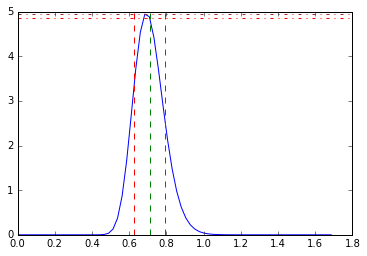

In [29]:
# An illustration:

# there is a difference between mean sigma , 
# the value of p(sigma) at the mean_sigma,  
# and the maximum of p(sigma)

fig,ax = plt.subplots()
ax.plot(sigma_int, p_sigma)
E = np.sum(p_sigma*sigma_int) / np.sum(p_sigma)   # mean 
stdev = np.sqrt(np.sum(sigma_int*sigma_int*p_sigma)/ np.sum(p_sigma)  - E*E)  # stdev 
max_value = max(p_sigma)
value_at_mean = np.interp(x=E,xp=sigma_int,fp=p_sigma)


ax.axvline(E, ls='--',c='g')
ax.axvline(E+stdev, ls='--', c='r')
ax.axvline(E-stdev, ls='--', c='r')
ax.axhline(max_value, ls='-.', c='brown')
ax.axhline(value_at_mean, ls='-.', c='r')


In [42]:
# Saved the parameters used for the simulation
params = {'N_pts' :N, 'N_bootstraps':Nboot, 'sigma_0' : sigma_0, 'N_iterations': N_iterations} 
fname = '01.11_save_params.npy'
np.save('../data_products/'+fname, params) 

In [43]:
# Save the results of calculation for future plotting...

# BEST way : numpy has a way of remembering the data structure !
# I HAVE NEVER HEARD OF THAT BEFORE - WHY ? 
fname = '01.11_save_A_chi2_stdev_mean.npy'
np.save('../data_products/'+fname, stats) 

## Plot the results 

In [44]:
#If this has been done before: save time, just load the most recent results....
# Load the results of calculation ... 
fname = '01.11_save_A_chi2_stdev_mean.npy'
saved = np.load('../data_products/'+fname).item()

#saved.keys()  # these are values of amplitude , sampled between 0.01 and 1 


In [45]:
# Load the parameters used for the calculation...
fname = '01.11_save_params.npy'
params = np.load('../data_products/'+fname).item()
N = params['N_pts']


Number of iterations is 1000


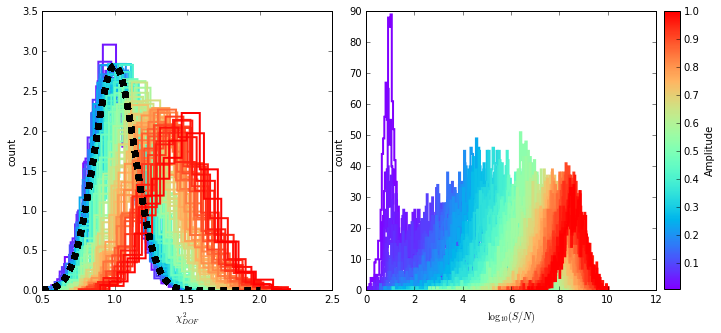

In [46]:
# plot the histogram of chi2dof 
import matplotlib
%matplotlib inline
from matplotlib.pyplot import cm 


# choose what is signal and what is noise... 
signal = 'mean_sigma' # 'value_at_mean'  # or 
noise = 'stdev'

#A_test  = np.linspace(0.01,1,100)

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(vmin=np.min(A_keys),vmax=np.max(A_keys))

# choose a colormap
c_m = cm.rainbow

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

print('Number of iterations is %d'%len(saved[A_keys[0]][signal]))

colors=cm.rainbow(np.linspace(0,1,len(A_keys)))
#fig,ax  = plt.subplots(1,2, figsize=(10,5))

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(11,5))
ax = dict()

gs = gridspec.GridSpec(1,10)
ax[0] = plt.subplot(gs[0, :5])  # first  col
ax[1] = plt.subplot(gs[0, 5:])  # first two cols 
#ax[2] = plt.subplot(gs[0, 10])  # span both rows, only second col 
gs.update(wspace=1.1)

for A in A_keys : 
    bins = np.linspace(0.5,2,100)
    sigma  = np.sqrt(2/N)
    mu = 1
    import gc ; gc.collect()
    ax[0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
               lw=6, color='black', ls='--', alpha=0.5) # overplotting Gaussian curve 
    ax[0].hist(saved[A]['chi2dof'], histtype='step', label='A='+str(A), color = s_m.to_rgba(A), normed=True, lw=2)  # chi2 
    ax[1].hist(saved[A][signal] / saved[A][noise], histtype='step', label='A='+str(A),color = s_m.to_rgba(A), lw=2, bins=100)  # S/N 
    #exp_SN = A / (sigma_0*np.sqrt(2/N))
    #ax[1].axvline(exp_SN, ls='--',color = col, lw=2)
    #print('For A=%f, we expect <S/N> = %f'%(A,exp_SN))
    #ax[0].legend(loc='upper right')
    #ax[1].legend(loc='upper right')
    #ax[0].set_title(r'$\chi^{2}_{DOF}$')
    #ax[1].set_title(r'$S/N$')
    ax[0].set_ylabel('count')
    ax[1].set_ylabel('count')
    ax[0].set_xlabel(r'$\chi^{2}_{DOF}$')
    ax[1].set_xlabel(r'$\log_{10}{(S/N)}$')
    
#import matplotlib.pyplot as plt
#sm = plt.cm.ScalarMappable(cmap=cm.rainbow(100), norm=plt.Normalize(vmin=min(A_values), vmax=max(A_values)))
# fake up the array of the scalar mappable. Urgh...
#sm._A = []
#plt.colorbar(sm)
x0 = 0.91
y0 = 0.13
dx = 0.02
dy = 0.77
colorbar_ax = fig.add_axes([x0, y0, dx, dy])
cbar = fig.colorbar(s_m, ax=ax[1], cax=colorbar_ax)
cbar.set_label('Amplitude')

plt.savefig('../data_products/01.11_chi_sq_dof_SN_histograms.png')

According to chapter 10.1.1, the minimum detectable amplitude for a time series $y = A sin(\omega t)$ sampled by N points, with homoscedastic Gaussian errors with standard deviation $\sigma$, is  $A_{min} = 2.6 \sigma / N^{1/4}$.

For the simulation above, N=100,  $\sigma=1.0$, so:

In [121]:
print('A_min = %f'%(2.6 / np.power(100,0.25)))

A_min = 0.822192


The standard deviation for $\chi^{2}$ distribution is $\sigma = \sqrt{(2/N)}$. For $N=100$, $\sigma = 0.14$, so that $1+3 \sigma = 1.42$, and $1+5\sigma=1.70$. On the scatter plot below of S/N vs $\chi^{2}_{DOF}$ we mark $3 \sigma$ and $5 \sigma$ levels by horizontal dashed lines.  

    A_keys : array of 100 values of amplitude , sampled from 0.01 to 1 
    
For each A we make 1000 realizations of time series with N=100 points.  For each realization, we calculate the AstroML 5.8 $\sigma$, as well as properties of the PDF : $p(\sigma)$, that yields $S/N$ for each time series.  We also calculate for each realization the value of $\chi^{2}_{DOF}$ against the hypothesis of no variability (model y=1 ) .  

The aim is to compare how does $\chi^{2}_{DOF}$ compare to $S/N$ in selecting variable objects for a given (input) amplitude. Since for each A we have 1000 realizations of time series, we can plot the histogram of $\chi^{2}_{DOF}$ or $S/N$ , which is done in figure above.  

Below we plot $\chi^{2}_{DOF}$ vs $S/N$  as a scatter plot.  The points can be binned, and colored by various properties : eg. count of points in a given $\chi^{2}_{DOF}$ - $S/N$ bin,  or some other property (eg. mean amplitude of points in that bin , etc. , using binned_statistic_2d  )  



In [13]:
saved.keys()

dict_keys([0.51000000000000001, 0.26000000000000001, 0.25, 1.0, 0.58999999999999997, 0.68000000000000005, 0.34000000000000002, 0.84000000000000008, 0.42999999999999999, 0.14000000000000001, 0.93000000000000005, 0.5, 0.099999999999999992, 0.92000000000000004, 0.52000000000000002, 0.42000000000000004, 0.60999999999999999, 0.36000000000000004, 0.029999999999999999, 0.79000000000000004, 0.98999999999999999, 0.70000000000000007, 0.62, 0.089999999999999997, 0.069999999999999993, 0.58000000000000007, 0.54000000000000004, 0.28000000000000003, 0.13, 0.96999999999999997, 0.47000000000000003, 0.65000000000000002, 0.82000000000000006, 0.080000000000000002, 0.31, 0.90000000000000002, 0.56000000000000005, 0.23000000000000001, 0.27000000000000002, 0.15000000000000002, 0.71999999999999997, 0.39000000000000001, 0.64000000000000001, 0.48999999999999999, 0.45000000000000001, 0.81000000000000005, 0.16, 0.33000000000000002, 0.18000000000000002, 0.83000000000000007, 0.01, 0.67000000000000004, 0.060000000000

In [59]:
a = np.arange(100)
b = np.arange(100) * 0.01
msk_a = (a > 10) * ( a < 90 )
msk_b = (b > 0.7)* ( b<0.9 )
msk_ab = msk_a * msk_b
a[msk_ab]

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89])

We chose 99998 out of 100000 total rows for plotting 
That is, 99.998 % of data


We chose 99998 out of 100000 total rows for plotting 
That is, 99.998 % of data


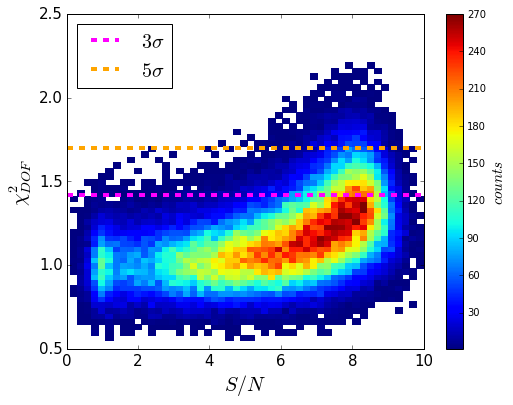

In [158]:
# SN limits 
x_min = 0.1
x_max = 10

# chi2dof limits 
y_min = 0
y_max = 10

plot_data = {'chi2dof':np.zeros(0, dtype=float), 'SN':np.zeros(0, dtype=float),
            'A':np.zeros(0, dtype=float)}

signal = 'mean_sigma' 
noise = 'stdev'

# loop over values of amplitude

# 1) grab all chi2 and SN valus for a given  amplitude 
# 2) throw away all those values outside of the desired bounds for the scatter plot 
# 3) append chi2, SN, and A value to the new structure where each row represents and individual iteration 
#   --> thus we are choosing rows from 100 * 1000 available
sel = 100
for A in A_keys[:sel] : 
    mask_chi = (saved[A]['chi2dof'] > y_min ) *(saved[A]['chi2dof'] < y_max)
    SN = saved[A][signal] / saved[A][noise]
    mask_SN  = (SN > x_min) * (SN < x_max)
    mask_comb = mask_chi * mask_SN
    chi2 =  saved[A]['chi2dof'][mask_comb]
    SN = SN[mask_comb]
    plot_data['chi2dof'] = np.append(plot_data['chi2dof'], chi2)
    plot_data['SN'] = np.append(plot_data['SN'], SN)
    plot_data['A']  = np.append(plot_data['A'], np.ones_like(SN) * A)

N_chosen = len(plot_data['SN'])
N_total = params['N_iterations'] * len(A_keys[:sel])
print('We chose %d out of %d total rows for plotting '%(N_chosen, 
                                                        N_total))
print('That is, %.3f %% of data'%(100*N_chosen / N_total))

# the 2D binned_statistic histograms are inspired by work in VarStat_exploratory_ugriz_results.ipynb  
from scipy.stats import binned_statistic_2d

fig,ax = plt.subplots(figsize=(8,6))

stats = binned_statistic_2d(x=plot_data['SN'], y=plot_data['chi2dof'], 
                            values = plot_data['A'], statistic='count', bins=50)
    
z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0 
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size 
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros... 

# Plot 2D histogram using pcolor
image = ax.pcolormesh(x_edges,y_edges,z_masked, cmap='jet')  # np.log10(z_masked) gives log counts 
#ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.tick_params(axis='both', which='major', labelsize=15) 
#ax.set_xlim(0,2)
#ax.set_ylim(0,.08)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=20)
ax.set_xlabel(r'$S/N$', fontsize=20)

# horizontal lines for 3 sigma and 5 sigma levels... 
style = '--'
width = 4
color = 'magenta'
ax.axhline(1.42, lw=width, ls=style, c='magenta', label=r'$3 \sigma$')
ax.axhline(1.70, lw=width, ls=style, c='orange', label=r'$5 \sigma$')
plt.legend(loc='upper left', fontsize=20)
#ax.set_title(r'$$', fontsize=20)
#colorbar_ax = fig.add_axes([0.2, 0.86, 0.4, 0.01])
colorbar = fig.colorbar(image, ax = ax,  orientation='vertical')
colorbar.set_label(r'$counts$', fontsize=15)
plt.savefig('../data_products/01.11_chi_sq_dof_SN_scatter_plot.png')

NOTE : above we used \verb|statistic='count'| .  There is nothing that would make it hard to use statistic='mean'  (mean Amplitude per bin), or anything else... 

## Illustrating eq. 10.57, and 10.1.1 : minimum detectable amplitude 

As proved in my Variability Detection write-up,  if we consider a harmonic time-series, $y = A sin(\omega t)$ , for which the variance is $V = A^{2}/2 + \sigma^{2}$,  and $\chi^{2}_{DOF,series} = V / \sigma^{2}$ .  If we want to distinguish a time-series from noise, we  may 
    
a) require that it's $\chi^{2}_{DOF,series}$ has at least $3\sigma$ departure from pure noise ($\chi^{2}_{DOF,noise} = 1$ ),  so that we have :
$\chi^{2}_{DOF,series} =  V / \sigma^{2} = 1 +3 \sqrt{2/N}$, we find that :
  * $A_{min} /\sigma = 2.9 / N^{1/4}$

b) require that the $\Delta BIC = BIC_{series} - BIC_{noise} > 10$, so that (from eq. 10.57 and the proof in my Variability Detection write-up):
  * $A_{min}/\sigma = \left( \frac{6 \ln {N} + 20 }{N} \right) ^ {1/2}$
  
c) require that the $\Delta AIC = AIC_{series} - AIC_{noise} > 10$, so that : 
  * $A_{min} / \sigma = \sqrt{32/N}$

these three requirements are visualized on a plot below : 



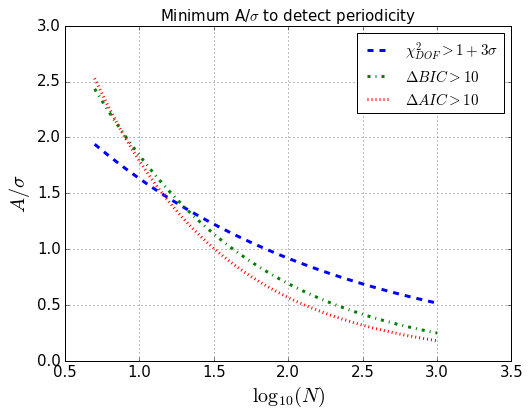

In [155]:
N = np.linspace(5,1001,1000)
fig,ax = plt.subplots(figsize=(8,6))
width = 3
ax.plot(np.log10(N), 2.9 / np.power(N,0.25), lw=width,ls= '--',label=r'$\chi^{2}_{DOF} >  1 + 3\sigma $')
ax.plot(np.log10(N), np.sqrt((6 * np.log(N)+20)/(N)), ls='-.',lw=width, label=r'$\Delta BIC > 10$')
ax.plot(np.log10(N), np.sqrt(32/N), lw=width, ls = ':', label=r'$\Delta AIC > 10$')
ax.set_ylabel(r'$A/\sigma$', fontsize=20)
ax.set_xlabel(r'$\log_{10}{(N)}$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.set_title('Minimum A/$\sigma$ to detect periodicity ', fontsize=15)
plt.legend(fontsize=15)
ax.grid()
